In [139]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
ruta = os.chdir(r"C:\Users\USER\Downloads")

In [3]:
df0 = pd.read_parquet("part-00000-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet")
df1 = pd.read_parquet("part-00001-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet")
df2 = pd.read_parquet("part-00002-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet")
df3 = pd.read_parquet("part-00003-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet")
df4 = pd.read_parquet("part-00004-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet")

In [4]:
base = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)

In [5]:
base

,AGRUPAGENTE,Altitud,antigedif,antigref,ANTIGUEDAD_VIVIENDA,anualidad_reemplazo,anualidad_seguro,AnyoCons_edif,AnyoCons_edif_total,AUX,...,zona_inundable_centroids,zonas_agri,zonas_de_extraccion_minera,zonas_en_construccion,zonas_fore,zonas_hume,zonas_industriales_o_comerciales,zonas_portuarias,zonas_quemadas,zonas_verdes_urbanas
0,1033.0,552.0,31.0,NaN,31.0,99.0,4.0,1961.0,1961.0,3.0,...,1.0,60.339419,2.297298,NaN,30.170863,NaN,7.734350,NaN,NaN,NaN
1,1033.0,552.0,30.0,NaN,30.0,99.0,3.0,1961.0,1961.0,3.0,...,1.0,60.339419,2.297298,NaN,30.170863,NaN,7.734350,NaN,NaN,NaN
2,1033.0,552.0,33.0,NaN,33.0,99.0,6.0,1961.0,1961.0,3.0,...,1.0,60.339419,2.297298,NaN,30.170863,NaN,7.734350,NaN,NaN,NaN
3,1033.0,552.0,34.0,NaN,34.0,99.0,7.0,1961.0,1961.0,3.0,...,1.0,60.339419,2.297298,NaN,30.170863,NaN,7.734350,NaN,NaN,NaN
4,1033.0,552.0,36.0,NaN,36.0,99.0,6.0,1961.0,1961.0,0.0,...,1.0,60.339419,2.297298,NaN,30.170863,NaN,7.734350,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928470,1035.0,NaN,34.0,9.0,9.0,99.0,9.0,1972.0,1977.0,3.0,...,1.0,9.168768,NaN,NaN,NaN,NaN,8.378925,4.073382,NaN,NaN
928471,1035.0,NaN,NaN,NaN,NaN,25.0,33.0,1972.0,1977.0,9.0,...,1.0,9.168768,NaN,NaN,NaN,NaN,8.378925,4.073382,NaN,NaN
928472,1035.0,NaN,69.0,15.0,15.0,99.0,8.0,1972.0,1977.0,5.0,...,1.0,9.168768,NaN,NaN,NaN,NaN,8.378925,4.073382,NaN,NaN
928473,1019.0,NaN,52.0,7.0,7.0,99.0,5.0,1972.0,1977.0,1.0,...,1.0,9.168768,NaN,NaN,NaN,NaN,8.378925,4.073382,NaN,NaN


In [6]:
base.columns

Index(['AGRUPAGENTE', 'Altitud', 'antigedif', 'antigref',
       'ANTIGUEDAD_VIVIENDA', 'anualidad_reemplazo', 'anualidad_seguro',
       'AnyoCons_edif', 'AnyoCons_edif_total', 'AUX',
       ...
       'zona_inundable_centroids', 'zonas_agri', 'zonas_de_extraccion_minera',
       'zonas_en_construccion', 'zonas_fore', 'zonas_hume',
       'zonas_industriales_o_comerciales', 'zonas_portuarias',
       'zonas_quemadas', 'zonas_verdes_urbanas'],
      dtype='object', length=681)

In [23]:
# Tomar el 10% de las filas
base_muestra = base.sample(frac=0.1, random_state=42)

In [64]:
# Variables de base
var_freq = 'stro_Corr_AGUAACAGBC'
peso = 'exp_corr_ACAGBC'
costo_total = 'CUPD_CAP_Corr_aguaacagbc'

# Suponiendo que ya tienes base_muestra definida
base_modelo = base_muestra[(base_muestra[peso] > 0) & (base_muestra[var_resp] > 0)].copy()

# Para modelo de frecuencia
base_modelo['frecuencia'] = base_modelo[var_resp] / base_modelo[peso]

# Para severidad típica
base_modelo['severidad_tipica'] = base_modelo[costo_total] / base_modelo[var_resp]

In [66]:
base_modelo.columns

Index(['AGRUPAGENTE', 'Altitud', 'antigedif', 'antigref',
       'ANTIGUEDAD_VIVIENDA', 'anualidad_reemplazo', 'anualidad_seguro',
       'AnyoCons_edif', 'AnyoCons_edif_total', 'AUX',
       ...
       'zonas_en_construccion', 'zonas_fore', 'zonas_hume',
       'zonas_industriales_o_comerciales', 'zonas_portuarias',
       'zonas_quemadas', 'zonas_verdes_urbanas', 'frecuencia',
       'severidad_tipica', 'resp'],
      dtype='object', length=684)

## Histograma

In [58]:
def graficar_barras_linea(df, x_col, bar_col, line_col,
                          titulo='Composición de la cartera por año',
                          ylabel_bar='Exposición',
                          ylabel_line='Frecuencia',
                          color_bar='skyblue', color_line='red'):
    """
    Grafica barras (bar_col) y línea (line_col) sobre el eje x (x_col).
    """
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Eje de barras
    ax1.bar(df[x_col], df[bar_col], color=color_bar, alpha=0.6)
    ax1.set_ylabel(ylabel_bar, color=color_bar)
    ax1.set_xlabel(x_col)
    ax1.tick_params(axis='y', labelcolor=color_bar)

    # Eje de línea (frecuencia)
    ax2 = ax1.twinx()
    ax2.plot(df[x_col], df[line_col], color=color_line, marker='o', linewidth=2)
    ax2.set_ylabel(ylabel_line, color=color_line)
    ax2.tick_params(axis='y', labelcolor=color_line)

    plt.title(titulo)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

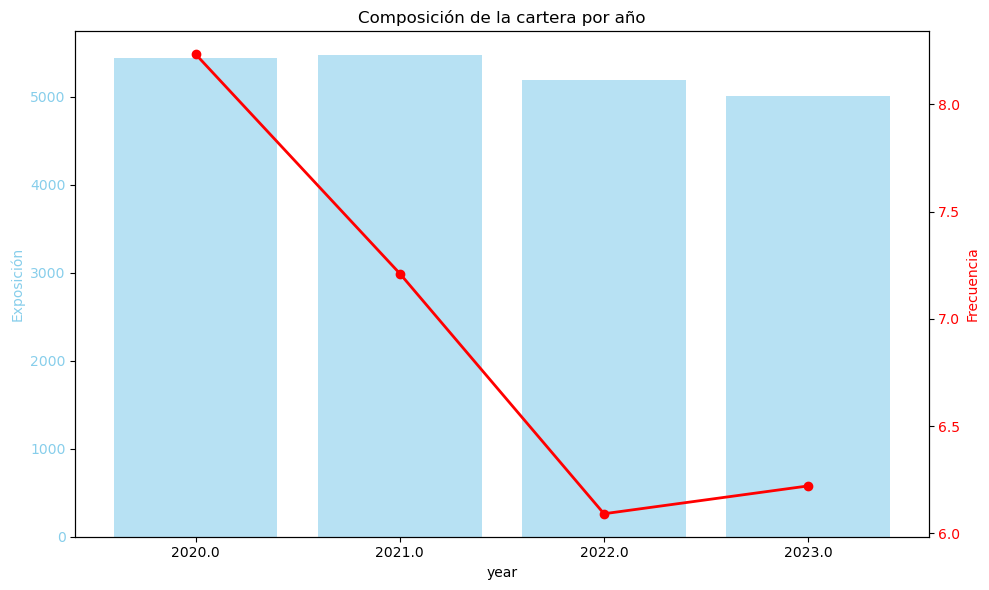

In [60]:
base_muestra[ano]=base_muestra[ano].astype(str)
base_resumido = base_muestra.groupby(ano).agg({peso: 'sum', 'resp': 'mean'}).reset_index()
graficar_barras_linea(base_resumido,ano,peso,'resp')

## Modelo 1

In [113]:
data_dict = pd.read_excel("data_dict.xlsx")

In [123]:
#Variables numericas de la categoria riesgo
factores_1 = data_dict[(data_dict['NUMERICA'] == 1) & (data_dict['CATEGORÍA'] == '04.Riesgo')]['Factores'].tolist()

In [125]:
base_modelo[factores_1].dtypes

antigedif                   float64
antigref                    float64
ANTIGUEDAD_VIVIENDA         float64
CUPD_CAP_Corr_aguaacagbc    float64
CUPD_Exc_aguaacagbc         float64
exp_corr_ACAGBC             float64
K_ACAGBC                    float64
stro_1a_AGUAACAGBC          float64
stro_2a_AGUAACAGBC          float64
stro_3a_AGUAACAGBC          float64
stro_4a_AGUAACAGBC          float64
stro_5a_AGUAACAGBC          float64
stro_Corr_AGUAACAGBC        float64
Stro_G_aguaacagbc             int32
SUPERFICIE                  float64
dtype: object

In [171]:
factores = base_modelo[[
    'year','antigedif','anualidad_seguro','FP','K_ACAGBC','SUPERFICIE','stro_1a_AGUAACAGBC','NIF_TIPO'
]]

In [173]:
key_words = ['year', 'antigedif', 'NIF_TIPO']

df_encoded = pd.get_dummies(base_modelo, columns=key_words, drop_first=True)

cols_encoded = [
    each for each in df_encoded.columns 
    if any(keyword in each for keyword in key_words)
]

factores_updated = [each for each in factores if each not in key_words]

final_features = list(set(cols_encoded + factores_updated))

final_features

['antigedif_10.0',
 'antigedif_78.0',
 'antigedif_22.0',
 'antigedif_115.0',
 'antigedif_54.0',
 'antigedif_99.0',
 'antigedif_9.0',
 'K_ACAGBC',
 'antigedif_57.0',
 'antigedif_112.0',
 'antigedif_101.0',
 'antigedif_83.0',
 'antigedif_56.0',
 'year_2023.0',
 'antigedif_59.0',
 'antigedif_113.0',
 'antigedif_88.0',
 'antigedif_114.0',
 'antigedif_19.0',
 'antigedif_76.0',
 'antigedif_11.0',
 'antigedif_67.0',
 'antigedif_106.0',
 'antigedif_30.0',
 'antigedif_79.0',
 'antigedif_37.0',
 'SUPERFICIE',
 'antigedif_5.0',
 'antigedif_68.0',
 'antigedif_92.0',
 'antigedif_40.0',
 'antigedif_38.0',
 'antigedif_108.0',
 'antigedif_31.0',
 'antigedif_121.0',
 'antigedif_14.0',
 'antigedif_51.0',
 'antigedif_109.0',
 'antigedif_62.0',
 'antigedif_82.0',
 'antigedif_1.0',
 'antigedif_86.0',
 'antigedif_45.0',
 'antigedif_13.0',
 'antigedif_25.0',
 'antigedif_69.0',
 'NIF_TIPO_J',
 'antigedif_122.0',
 'antigedif_17.0',
 'antigedif_71.0',
 'antigedif_119.0',
 'antigedif_100.0',
 'antigedif_26.0',
 

In [175]:
X = df_encoded[list(set(cols_encoded + factores_updated))].astype('float')
X = sm.add_constant(X)
y = base_modelo['frecuencia']
offset = np.log(base_modelo[peso])  # Asegúrate que peso = 'exp_corr_ACAGBC'

#limpiar los datos
datos_completos = X.copy()
datos_completos['y'] = y
datos_completos['offset'] = offset
datos_completos = datos_completos.replace([np.inf, -np.inf], np.nan).dropna()

y_limpio = datos_completos['y']
offset_limpio = datos_completos['offset']
X_limpio = datos_completos.drop(columns=['y', 'offset'])

#Ajustar modelo
modelo = sm.GLM(y_limpio, X_limpio, family=sm.families.Poisson(), offset=offset_limpio)
resultado = modelo.fit()

print(resultado.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                15287
Model:                            GLM   Df Residuals:                    15153
Model Family:                 Poisson   Df Model:                          133
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8148e+06
Date:                Thu, 10 Apr 2025   Deviance:                   3.5736e+06
Time:                        13:16:43   Pearson chi2:                 3.88e+08
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2968      0

In [176]:
def calculate_bic(model):
    n = len(model.model.endog)  # Número de observaciones
    k = model.df_model + 1  # Número de parámetros (df_model incluye los coeficientes, sumamos 1 por el intercepto)
    bic = np.log(n) * k - 2 * model.llf  # BIC = ln(n) * k - 2 * log-verosimilitud
    return bic
calculate_bic(resultado)

3630940.1528584403

## Modelo 2

In [179]:
factores_2 = base_modelo[[
    'year','antigref','anualidad_seguro','FP','K_ACAGBC','SUPERFICIE','stro_1a_AGUAACAGBC','NIF_TIPO'
]]

In [183]:
key_words_2 = ['year', 'antigref', 'NIF_TIPO']

df_encoded_2= pd.get_dummies(base_modelo, columns=key_words_2, drop_first=True)

cols_encoded_2 = [
    each for each in df_encoded_2.columns 
    if any(keyword in each for keyword in key_words)
]

factores_updated_2 = [each for each in factores_2 if each not in key_words_2]

final_features_2 = list(set(cols_encoded_2 + factores_updated_2))

final_features_2

['antigref_31.0',
 'year_2021.0',
 'antigref_32.0',
 'antigref_42.0',
 'antigref_22.0',
 'K_ACAGBC',
 'antigref_14.0',
 'antigref_20.0',
 'antigref_23.0',
 'antigref_18.0',
 'antigref_36.0',
 'antigref_64.0',
 'year_2023.0',
 'antigref_46.0',
 'NIF_TIPO_J',
 'antigref_56.0',
 'antigref_1.0',
 'antigref_13.0',
 'antigref_5.0',
 'antigref_29.0',
 'antigref_11.0',
 'antigref_39.0',
 'antigref_3.0',
 'antigref_43.0',
 'antigref_17.0',
 'antigref_61.0',
 'antigref_8.0',
 'FP',
 'antigref_26.0',
 'antigref_7.0',
 'year_2022.0',
 'antigref_10.0',
 'antigref_30.0',
 'antigref_57.0',
 'SUPERFICIE',
 'antigref_35.0',
 'antigref_49.0',
 'antigref_40.0',
 'antigref_21.0',
 'antigref_16.0',
 'antigref_24.0',
 'antigref_33.0',
 'antigref_28.0',
 'antigref_34.0',
 'anualidad_seguro',
 'stro_1a_AGUAACAGBC',
 'antigref_41.0',
 'antigref_51.0',
 'antigref_38.0',
 'antigref_6.0',
 'antigref_9.0',
 'NIF_TIPO_N',
 'antigref_19.0',
 'antigref_47.0',
 'antigref_4.0',
 'antigref_12.0',
 'antigref_15.0',
 'ant

In [185]:
X_2 = df_encoded_2[list(set(cols_encoded_2 + factores_updated_2))].astype('float')
X_2 = sm.add_constant(X)
y_2 = base_modelo['frecuencia']
offset_2 = np.log(base_modelo[peso]) 

#limpiar los datos
datos_completos_2 = X_2.copy()
datos_completos_2['y_2'] = y_2
datos_completos_2['offset_2'] = offset_2
datos_completos_2 = datos_completos_2.replace([np.inf, -np.inf], np.nan).dropna()

y_limpio_2 = datos_completos_2['y_2']
offset_limpio_2 = datos_completos_2['offset_2']
X_limpio_2 = datos_completos_2.drop(columns=['y_2', 'offset_2'])

#Ajustar modelo
modelo_2 = sm.GLM(y_limpio_2, X_limpio_2, family=sm.families.Poisson(), offset_2=offset_limpio_2)
resultado_2 = modelo_2.fit()

print(resultado_2.summary())

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['offset_2']
  warnings.warn(msg, ValueWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    y_2   No. Observations:                15287
Model:                            GLM   Df Residuals:                    15153
Model Family:                 Poisson   Df Model:                          133
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.5005e+05
Date:                Thu, 10 Apr 2025   Deviance:                   1.0440e+06
Time:                        13:23:57   Pearson chi2:                 2.69e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9976
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3935      0

In [187]:
calculate_bic(resultado_2
             )

1101400.0717610966